### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.data_analyzer import DataAnalyzer as data_analyzer 

## Explain

In [4]:
# Tree-Cycles.................................................................
# TopSelect
# config_f_name = 'E6-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
config_f_name = 'E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'

# ASD........................................................................
# TopSelect
# config_f_name = 'E1-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-BestSelect.jsonc'
# Union
# config_f_name = 'E2-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# Intersection
# config_f_name = 'E3-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc
2024-05-27 18:44:57,-1158620450 | INFO | 692175 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc Run: 2
2024-05-27 18:44:57,-1158620427 | INFO | 692175 - Creating the evaluation manager....................................
2024-05-27 18:44:57,-1158620408 | INFO | 692175 - Creating the paired  evaluators.....................................
2024-05-27 18:44:58,-1158620289 | INFO | 692175 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-27 18:44:58,-1158620139 | INFO | 692175 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-27 18:44:58,-1158620121 | INFO | 692175 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-27 18:44:58,-1158620090 | INFO | 692175 - Instantiating: torch.optim.RMSprop
2024-05-27 18:44:58,-1158620088 | INFO | 692175 - I

/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/src/explainer/generative/gans/graph/res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-27 18:45:06,-1158611930 | INFO | 692175 - evaluated instance with id 0
2024-05-27 18:45:06,-1158611927 | INFO | 692175 - Evaluating instance with id 1
2024-05-27 18:45:06,-1158611414 | INFO | 692175 - evaluated instance with id 1
2024-05-27 18:45:06,-1158611413 | INFO | 692175 - Evaluating instance with id 2
2024-05-27 18:45:07,-1158610853 | INFO | 692175 - evaluated instance with id 2
2024-05-27 18:45:07,-1158610851 | INFO | 692175 - Evaluating instance with id 3
2024-05-27 18:45:09,-1158609206 | INFO | 692175 - evaluated instance with id 3
2024-05-27 18:45:09,-1158609202 | INFO | 692175 - Evaluating instance with id 4
2024-05-27 18:45:10,-1158607712 | INFO | 692175 - evaluated instance with id 4
2024-05-27 18:45:10,-1158607709 | INFO | 692175 - Evaluating instance with id 5
2024-05-27 18:45:11,-1158607028 | INFO | 692175 - evaluated instance with id 5
2024-05-27 18:45:11,-1158607027 | INFO | 692175 - Evaluating instance with id 6
2024-05-27 18:45:11,-1158606572 | INFO | 69217

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-27 18:48:25,-1158412796 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-27 18:48:25,-1158412793 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-27 18:48:25,-1158412792 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-27 18:48:25,-1158412783 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-27 18:48:25,-1158412761 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-27 18:48:25,-1158412752 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-27 18:48:25,-1158412751 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-27 18:48:25,-1158412676 | INFO | 692175 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetri

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationTopSelect,1.045758,0.409172,5.365289,0.034711,504.410156,170.761719,0.960938,0.015625,0.099162,0.003256,0.945312,0.015625,0.992188,0.000000
1,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationRandom,1.109342,0.000000,1.900000,0.000000,462.625000,0.000000,0.781250,0.000000,0.026422,0.000000,0.750000,0.000000,0.984375,0.000000
2,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationUnion,1.206500,0.000000,24.570652,0.000000,547.406250,0.000000,0.718750,0.000000,0.447030,0.000000,0.687500,0.000000,0.976562,0.000000
3,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.236774,0.000000,1.314050,0.000000,164.640625,0.000000,0.945312,0.000000,0.022194,0.000000,0.945312,0.000000,1.000000,0.000000
4,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,DCESExplainer,0.086789,0.000000,44.679688,0.000000,129.000000,0.000000,1.000000,0.000000,0.801405,0.000000,1.000000,0.000000,1.000000,0.000000
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,4.155696,0.326201,9.921818,1.731923,1019.548182,115.468089,1.000000,0.000000,0.012867,0.002268,0.547273,0.316118,0.773636,0.158059


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [13]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [14]:
changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [15]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(0, 20), (1, 13), (1, 14), (3, 20), (4, 8), (6, 7), (6, 14), (6, 17), (7, 19), (9, 16), (9, 26), (10, 13), (11, 12), (12, 15), (15, 21), (16, 19), (16, 20), (18, 20), (21, 22), (22, 23), (24, 25), (24, 27), (25, 26), (26, 27)]
removed_edges: [(0, 11), (0, 13), (0, 14), (0, 26), (1, 23), (2, 6), (3, 4), (3, 18), (4, 7), (4, 23), (5, 9), (5, 10), (5, 12), (5, 24), (6, 25), (7, 8), (8, 16), (9, 15), (9, 17), (10, 18), (11, 23), (12, 22), (12, 27), (13, 19), (16, 25), (20, 22)]
added nodes: []
removed nodes: []


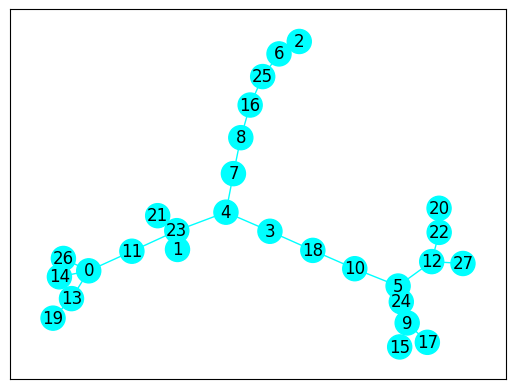

In [16]:
pos = data_analyzer.draw_graph(og_inst)

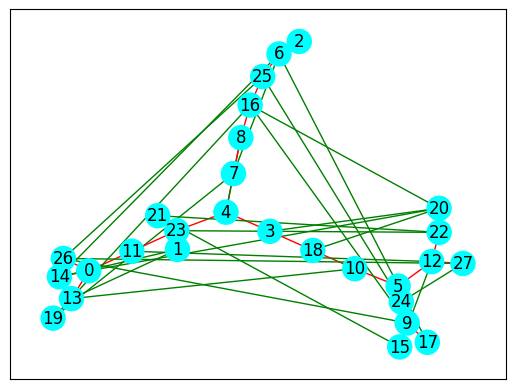

In [17]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [18]:
exp.explainer.name

'ExplanationUnion-550f26dea9a975ab43a0a7601ff14e3b'

# Explanation Graphs Union

### Setting Imports

In [4]:
# Tree-Cycles
config_f_name = 'E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'
# ASD
# config_f_name = 'E2-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc
2024-05-02 18:13:41,974470780 | INFO | 13508 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E7-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Union.jsonc Run: 2
2024-05-02 18:13:41,974470805 | INFO | 13508 - Creating the evaluation manager....................................
2024-05-02 18:13:41,974470832 | INFO | 13508 - Creating the paired  evaluators.....................................
2024-05-02 18:13:42,974470929 | INFO | 13508 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-02 18:13:42,974470998 | INFO | 13508 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-02 18:13:42,974471009 | INFO | 13508 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-02 18:13:42,974471132 | INFO | 13508 - Instantiating: torch.optim.RMSprop
2024-05-02 18:13:42,974471134 | INFO | 13508 - Instantiating: torch.nn.CrossEntropyLoss


c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-02 18:14:04,974493411 | INFO | 13508 - evaluated instance with id 0
2024-05-02 18:14:04,974493412 | INFO | 13508 - Evaluating instance with id 1
2024-05-02 18:14:09,974498679 | INFO | 13508 - evaluated instance with id 1
2024-05-02 18:14:09,974498680 | INFO | 13508 - Evaluating instance with id 2
2024-05-02 18:14:15,974504389 | INFO | 13508 - evaluated instance with id 2
2024-05-02 18:14:15,974504390 | INFO | 13508 - Evaluating instance with id 3
2024-05-02 18:14:20,974509871 | INFO | 13508 - evaluated instance with id 3
2024-05-02 18:14:20,974509872 | INFO | 13508 - Evaluating instance with id 4
2024-05-02 18:14:26,974515236 | INFO | 13508 - evaluated instance with id 4
2024-05-02 18:14:26,974515239 | INFO | 13508 - Evaluating instance with id 5
2024-05-02 18:14:31,974520416 | INFO | 13508 - evaluated instance with id 5
2024-05-02 18:14:31,974520418 | INFO | 13508 - Evaluating instance with id 6
2024-05-02 18:14:36,974525890 | INFO | 13508 - evaluated instance with id 6
2024-0

### Aggregatting the Results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-02 18:22:12,974981745 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 18:22:12,974981747 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-02 18:22:12,974981748 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-02 18:22:12,974981754 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-02 18:22:12,974981758 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-02 18:22:12,974981760 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-02 18:22:12,974981762 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-02 18:22:12,974981772 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 18:22:12,97

2024-05-02 18:22:12,974981808 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-02 18:22:12,974981813 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-02 18:22:12,974981821 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-02 18:22:12,974981824 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-02 18:22:12,974981827 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-02 18:22:12,974981830 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-02 18:22:12,974981856 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 18:22:12,974981862 | INFO | 13508 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-02 18:22

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,2.846766,0.526407,4.609182,0.674400,307.214844,4.558594,0.441406,0.082031,0.038607,1.209366e-02,0.441406,0.082031,1.000000,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationTopSelect,2.466957,0.865748,5.356299,0.187008,418.710938,139.500000,0.992188,0.000000,0.097369,1.541162e-03,0.992188,0.000000,1.000000,0.0


In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

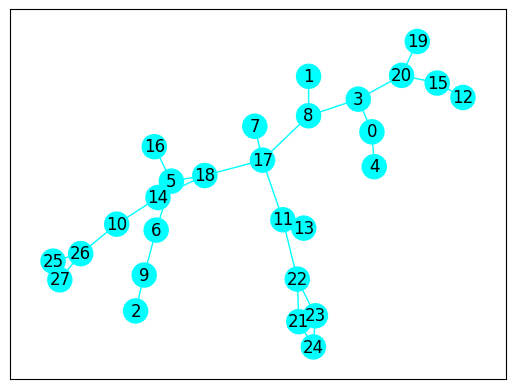

In [16]:
pos = data_analyzer.draw_graph(og_inst)

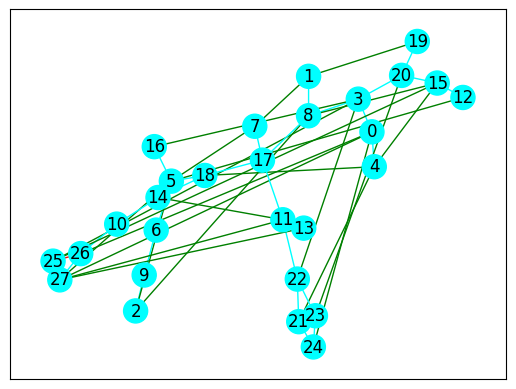

In [17]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [18]:
evaluator.oracle.predict(og_inst)

1

In [19]:
evaluator.oracle.predict(cf_inst)

0

# Explanations Intersection

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc
2024-05-03 15:17:52,1050321236 | INFO | 18544 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E8-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Intersection.jsonc Run: 2
2024-05-03 15:17:52,1050321259 | INFO | 18544 - Creating the evaluation manager....................................
2024-05-03 15:17:52,1050321286 | INFO | 18544 - Creating the paired  evaluators.....................................
2024-05-03 15:17:54,1050323889 | INFO | 18544 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-03 15:17:56,1050325637 | INFO | 18544 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-03 15:17:56,1050325655 | INFO | 18544 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-03 15:17:56,1050325737 | INFO | 18544 - Instantiating: torch.optim.RMSprop
2024-05-03 15:17:56,1050325739 | INFO | 18544 - Instantiating: torc

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-03 15:18:34,1050363012 | INFO | 18544 - evaluated instance with id 1
2024-05-03 15:18:34,1050363014 | INFO | 18544 - Evaluating instance with id 2
2024-05-03 15:18:38,1050367568 | INFO | 18544 - evaluated instance with id 2
2024-05-03 15:18:38,1050367570 | INFO | 18544 - Evaluating instance with id 3
2024-05-03 15:18:43,1050372340 | INFO | 18544 - evaluated instance with id 3
2024-05-03 15:18:43,1050372341 | INFO | 18544 - Evaluating instance with id 4
2024-05-03 15:18:47,1050376891 | INFO | 18544 - evaluated instance with id 4
2024-05-03 15:18:47,1050376892 | INFO | 18544 - Evaluating instance with id 5
2024-05-03 15:18:52,1050381286 | INFO | 18544 - evaluated instance with id 5
2024-05-03 15:18:52,1050381288 | INFO | 18544 - Evaluating instance with id 6
2024-05-03 15:18:57,1050386337 | INFO | 18544 - evaluated instance with id 6
2024-05-03 15:18:57,1050386339 | INFO | 18544 - Evaluating instance with id 7
2024-05-03 15:18:58,1050387693 | INFO | 18544 - evaluated instance wit

### Aggregating the Results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-03 15:42:50,1051819319 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-03 15:42:50,1051819320 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-03 15:42:50,1051819322 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-03 15:42:50,1051819324 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-03 15:42:50,1051819326 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric


2024-05-03 15:42:50,1051819327 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-03 15:42:50,1051819330 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-03 15:42:50,1051819342 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-03 15:42:50,1051819343 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-03 15:42:50,1051819344 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-03 15:42:50,1051819346 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-03 15:42:50,1051819347 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-03 15:42:50,1051819349 | INFO | 18544 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-03 1

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationIntersection,3.542423,0.000000,5.746269,0.000000,592.882812,0.000000,0.523438,0.000000,0.064724,0.000000e+00,0.523438,0.000000,1.000000,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,2.846766,0.526407,4.609182,0.674400,307.214844,4.558594,0.441406,0.082031,0.038607,1.209366e-02,0.441406,0.082031,1.000000,0.0


### Analyzing instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

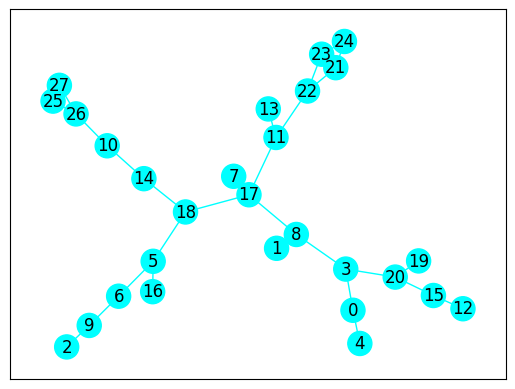

In [14]:
pos = data_analyzer.draw_graph(og_inst)

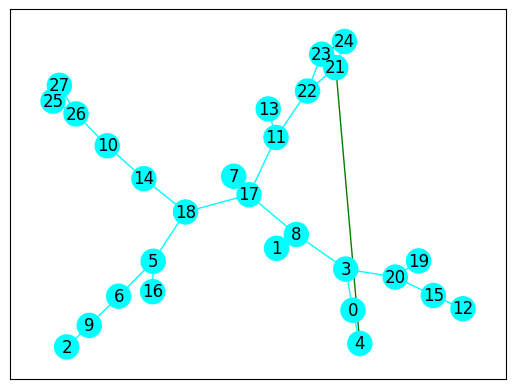

In [16]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Explanation Frequency

In [4]:
# Tree-Cycle
config_f_name = 'E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'
# ASD
# config_f_name = 'E4-ASD_ASDO_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc
2024-05-03 16:38:06,1055135181 | INFO | 12592 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\E9-TCR-128-28-0.25_GCN_Ens[DCE+OBS+iRand+RSGG]-Frequency.jsonc Run: 2
2024-05-03 16:38:06,1055135202 | INFO | 12592 - Creating the evaluation manager....................................
2024-05-03 16:38:06,1055135227 | INFO | 12592 - Creating the paired  evaluators.....................................
2024-05-03 16:38:08,1055137839 | INFO | 12592 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-03 16:38:10,1055139584 | INFO | 12592 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-03 16:38:10,1055139598 | INFO | 12592 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-03 16:38:10,1055139687 | INFO | 12592 - Instantiating: torch.optim.RMSprop
2024-05-03 16:38:10,1055139690 | INFO | 12592 - Instantiating: torch.nn.C

c:\Work\AIIM\gretel-silver\GRETEL\src\explainer\generative\gans\graph\res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3641.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-03 16:38:49,1055178286 | INFO | 12592 - evaluated instance with id 1
2024-05-03 16:38:49,1055178287 | INFO | 12592 - Evaluating instance with id 2
2024-05-03 16:38:54,1055183487 | INFO | 12592 - evaluated instance with id 2
2024-05-03 16:38:54,1055183489 | INFO | 12592 - Evaluating instance with id 3
2024-05-03 16:39:01,1055190440 | INFO | 12592 - evaluated instance with id 3
2024-05-03 16:39:01,1055190441 | INFO | 12592 - Evaluating instance with id 4
2024-05-03 16:39:06,1055195534 | INFO | 12592 - evaluated instance with id 4
2024-05-03 16:39:06,1055195535 | INFO | 12592 - Evaluating instance with id 5
2024-05-03 16:39:11,1055200347 | INFO | 12592 - evaluated instance with id 5
2024-05-03 16:39:11,1055200349 | INFO | 12592 - Evaluating instance with id 6
2024-05-03 16:39:27,1055216804 | INFO | 12592 - evaluated instance with id 6
2024-05-03 16:39:27,1055216806 | INFO | 12592 - Evaluating instance with id 7
2024-05-03 16:39:30,1055219476 | INFO | 12592 - evaluated instance wit

### Aggregating the results

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-03 17:39:07,1058796175 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-03 17:39:07,1058796179 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-03 17:39:07,1058796182 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-03 17:39:07,1058796183 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-03 17:39:07,1058796185 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-03 17:39:07,1058796187 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-03 17:39:07,1058796190 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-03 17:39:07,1058796195 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric


2024-05-03 17:39:07,1058796197 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-03 17:39:07,1058796199 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-03 17:39:07,1058796202 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-03 17:39:07,1058796204 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-03 17:39:07,1058796206 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-03 17:39:07,1058796208 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-03 17:39:07,1058796215 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-03 17:39:07,1058796218 | INFO | 12592 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.673051,0.219479,270.453704,270.453704,1012.881188,3.247525,0.267327,0.267327,0.344341,3.398598e-01,0.128713,0.128713,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationFrequency,10.598149,0.000000,7.115385,0.000000,662.656250,0.000000,0.304688,0.000000,0.064061,0.000000e+00,0.304688,0.000000,0.992188,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationIntersection,3.647559,0.105136,4.533849,1.212420,580.769531,12.113281,0.371094,0.152344,0.050752,1.397214e-02,0.371094,0.152344,1.000000,0.0


### Analyzing instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

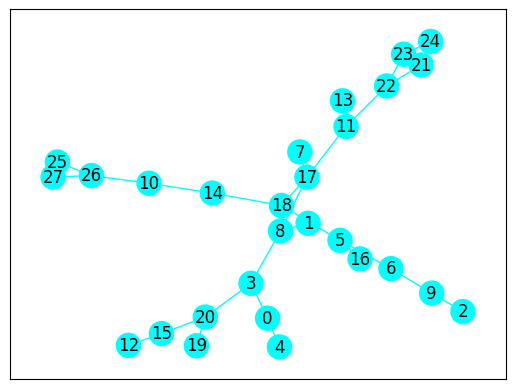

In [9]:
pos = data_analyzer.draw_graph(og_inst)

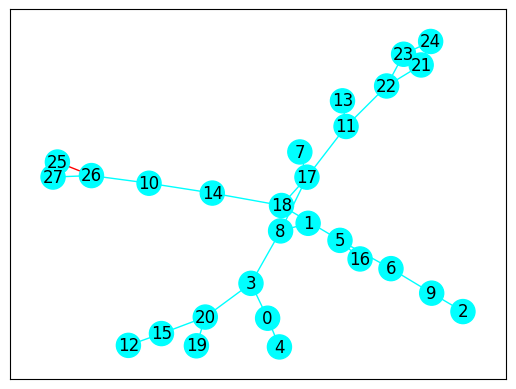

In [10]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

# Random Explanation Aggregator

In [4]:
# Tree-Cycles
config_f_name = 'E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'
# ASD
# config_f_name = 'E5-ASD_ASDO_Ens[OBS+2xiRand+RSGG]-Rand.jsonc'

### Evaluating the Explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc
2024-05-13 15:44:36,1915925581 | INFO | 2122365 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc Run: 2
2024-05-13 15:44:36,1915925593 | INFO | 2122365 - Creating the evaluation manager....................................
2024-05-13 15:44:36,1915925604 | INFO | 2122365 - Creating the paired  evaluators.....................................
2024-05-13 15:44:36,1915925700 | INFO | 2122365 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-13 15:44:36,1915925850 | INFO | 2122365 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-13 15:44:36,1915925869 | INFO | 2122365 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-13 15:44:37,1915926030 | INFO | 2122365 - Instantiating: torch.optim.RMSprop
2024-05-13 15:44:37,1915926031 | INFO | 2122365 - Instantiating: 

/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/src/explainer/generative/gans/graph/res_gen.py:61: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_probabilities += rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T,self.device)


2024-05-13 15:44:48,1915937178 | INFO | 2122365 - evaluated instance with id 0
2024-05-13 15:44:48,1915937181 | INFO | 2122365 - Evaluating instance with id 1
2024-05-13 15:44:49,1915938308 | INFO | 2122365 - evaluated instance with id 1
2024-05-13 15:44:49,1915938310 | INFO | 2122365 - Evaluating instance with id 2
2024-05-13 15:44:50,1915939324 | INFO | 2122365 - evaluated instance with id 2
2024-05-13 15:44:50,1915939326 | INFO | 2122365 - Evaluating instance with id 3
2024-05-13 15:44:51,1915940445 | INFO | 2122365 - evaluated instance with id 3
2024-05-13 15:44:51,1915940449 | INFO | 2122365 - Evaluating instance with id 4
2024-05-13 15:44:52,1915941508 | INFO | 2122365 - evaluated instance with id 4
2024-05-13 15:44:52,1915941510 | INFO | 2122365 - Evaluating instance with id 5
2024-05-13 15:44:53,1915942104 | INFO | 2122365 - evaluated instance with id 5
2024-05-13 15:44:53,1915942107 | INFO | 2122365 - Evaluating instance with id 6
2024-05-13 15:44:54,1915943639 | INFO | 212236

### Aggregating the results

In [8]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

2024-05-02 16:32:08,968377103 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 16:32:08,968377110 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-02 16:32:08,968377113 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-02 16:32:08,968377116 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-02 16:32:08,968377118 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-02 16:32:08,968377120 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-02 16:32:08,968377130 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-02 16:32:08,968377149 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 16:32:08,96

2024-05-02 16:32:08,968377184 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 16:32:08,968377188 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
2024-05-02 16:32:08,968377191 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
2024-05-02 16:32:08,968377194 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
2024-05-02 16:32:08,968377196 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
2024-05-02 16:32:08,968377199 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
2024-05-02 16:32:08,968377202 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
2024-05-02 16:32:08,968377228 | INFO | 10340 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
2024-05-02 16:32:08,96

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,OracleCallsMetric,OracleCallsMetric-std,CorrectnessMetric,CorrectnessMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std
0,demo,ASD-15273954d84e872cf0b021cd4477bfdc,ASDOracle-9e4f3586dc330143b7849fc540b25739,ObliviousBidirectionalSearchExplainer,0.409879,0.000000,10.454545,0.000000,367.363636,0.000000,1.000000,0.000000,0.013553,0.000000e+00,0.636364,0.000000,0.818182,0.0
1,demo,TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37,OracleTorch-f16f95a68a8f23c404f4684325d241af,ObliviousBidirectionalSearchExplainer,1.417809,0.914864,4.454545,0.454545,239.615385,155.692308,0.923077,0.076923,0.063462,1.174480e-03,0.923077,0.076923,1.000000,0.0
2,demo,TreeCyclesRand-b7fc179170d4f9e81e9efdc2d9265e91,TreeCyclesOracle-e67513927e99743ff3718c388e68fb02,RSGG,0.063364,0.015690,23.760000,0.590000,15.640000,2.160000,1.000000,0.000000,0.427735,1.044173e-02,1.000000,0.000000,1.000000,0.0
3,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationFrequency,5.226193,0.227379,561.190883,20.283476,1012.806931,3.321782,0.460396,0.074257,0.665147,1.905344e-02,0.232673,0.024752,0.772277,0.0
4,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationIntersection,5.194375,0.005148,583.252976,0.877976,1032.886139,4.232673,0.405941,0.009901,0.662231,7.808701e-03,0.227723,0.009901,0.772277,0.0
5,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationRandom,7.619725,0.000000,14.104167,0.000000,1029.891089,0.000000,0.237624,0.000000,0.004347,0.000000e+00,0.138614,0.000000,0.772277,0.0
6,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationTopSelect,5.141137,0.016324,10.029703,0.000000,1029.495050,25.792079,1.000000,0.000000,0.013008,1.131176e-07,0.544554,0.000000,0.772277,0.0
7,ensembles,ASD-ca8cc36049eb8589f68c35b0d8eebfbb,ASDOracle-74012801e4bd624973d6c15c0a46f2eb,ExplanationUnion,6.153826,0.987345,540.351852,2.370370,1007.658416,3.648515,0.534653,0.000000,0.679479,5.700593e-04,0.257426,0.000000,0.772277,0.0
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationRandom,2.846766,0.526407,4.609182,0.674400,307.214844,4.558594,0.441406,0.082031,0.038607,1.209366e-02,0.441406,0.082031,1.000000,0.0
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-74759045c06692032f0eea69f225627c,ExplanationTopSelect,2.466957,0.865748,5.356299,0.187008,418.710938,139.500000,0.992188,0.000000,0.097369,1.541162e-03,0.992188,0.000000,1.000000,0.0


# Analyzing Instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [8]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

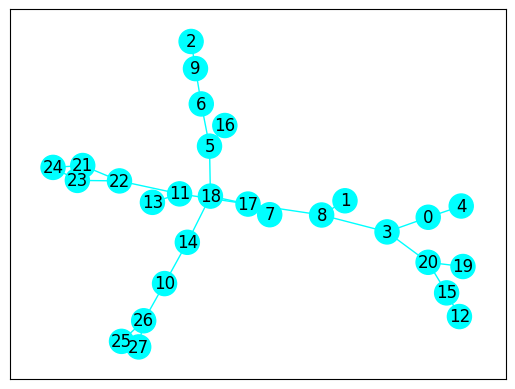

In [26]:
pos = data_analyzer.draw_graph(og_inst)

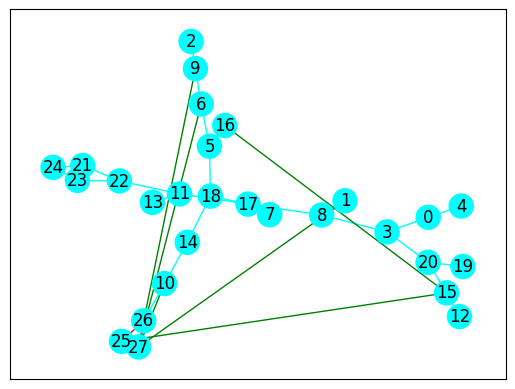

In [27]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [22]:
og_inst.label

1

In [23]:
cf_inst.label

0

# Explanation Bidirectional Search

In [ ]:
# Tree-Cycles
# config_f_name = ''
# ASD
config_f_name = 'E11-ASD_ASDO_Ens[OBS+2xiRand+2xRSGG]-Bidirectional.jsonc'

### Evaluating the Explainer

In [7]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 2
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc
2024-05-13 15:01:21,1913330742 | INFO | 2102107 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/E10-TCR-128-28_GCN_Ens[OBS+2xiRand+RSGG]-Rand.jsonc Run: 2
2024-05-13 15:01:21,1913330791 | INFO | 2102107 - Creating the evaluation manager....................................
2024-05-13 15:01:21,1913330807 | INFO | 2102107 - Creating the paired  evaluators.....................................
2024-05-13 15:01:22,1913331103 | INFO | 2102107 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-13 15:01:22,1913331353 | INFO | 2102107 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-05-13 15:01:22,1913331355 | INFO | 2102107 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
2024-05-13 15:01:22,1913331371 | INFO | 2102107 - Instantiating: torch.optim.RMSprop
2024-05-13 15:01:22,1913331372 | INFO | 2102107 - Instantiating: 

/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/src/explainer/generative/gans/graph/model.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = torch.mean(self.loss_fn(y_pred.squeeze().double(), y_batch.double()) * torch.tensor(oracle_scores, dtype=torch.float))


2024-05-13 15:01:23,1913332395 | INFO | 2102107 - Epoch 5	 Loss_D =  0.6378	 Loss_G =  0.6412
2024-05-13 15:01:23,1913332435 | INFO | 2102107 - Epoch 6	 Loss_D =  0.6852	 Loss_G =  0.6405
2024-05-13 15:01:23,1913332472 | INFO | 2102107 - Epoch 7	 Loss_D =  0.6837	 Loss_G =  0.6230
2024-05-13 15:01:23,1913332512 | INFO | 2102107 - Epoch 8	 Loss_D =  0.6205	 Loss_G =  0.6723
2024-05-13 15:01:23,1913332550 | INFO | 2102107 - Epoch 9	 Loss_D =  0.7183	 Loss_G =  0.6583
2024-05-13 15:01:23,1913332588 | INFO | 2102107 - Epoch 10	 Loss_D =  0.6347	 Loss_G =  0.6222
2024-05-13 15:01:23,1913332626 | INFO | 2102107 - Epoch 11	 Loss_D =  0.6694	 Loss_G =  0.6467
2024-05-13 15:01:23,1913332663 | INFO | 2102107 - Epoch 12	 Loss_D =  0.6839	 Loss_G =  0.6490
2024-05-13 15:01:23,1913332701 | INFO | 2102107 - Epoch 13	 Loss_D =  0.7365	 Loss_G =  0.6765
2024-05-13 15:01:23,1913332739 | INFO | 2102107 - Epoch 14	 Loss_D =  0.7586	 Loss_G =  0.6508
2024-05-13 15:01:23,1913332777 | INFO | 2102107 - Epoch

TypeError: can't multiply sequence by non-int of type 'float'

### Aggregating the Results

In [ ]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

### Analyzing Instances

In [ ]:
evaluator = eval_manager.evaluators[0]
evaluator

In [ ]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

In [ ]:
pos = data_analyzer.draw_graph(og_inst)

In [ ]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)